# Tekstanalyse og enkel maskinlæring
I denne notebooken skal vi gå gjennom hvordan man kan utforske tekstdata, og sette opp en enkel klassifisering av dataen.
Den første oppgaven er å generere et datasett. Dette kan du enkelt gjøre ved å gi ChatGPT et par eksempel, og be

In [71]:
!pip install wordcloud
!pip install plotly-express
!pip install umap-learn
!pip install scikit-learn
!pip install nltk #natural language toolkit
!pip install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from sentence_transformers import SentenceTransformer
import plotly.express as px
import umap.umap_ as umap
from collections import Counter

nltk.download('stopwords')

from nltk.corpus import stopwords

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malikaasen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
df = pd.read_csv('data/dataset.csv')
df_data = df['complaint']
print(df_data)

0                                                                 The search feature is not returning any results.
1                                                                 I am unable to click on the links in the navbar.
2                                                              The text on the page is overlapping and unreadable.
3                                                                 The images on the page are not loading properly.
4                                                                             I am unable to log in to my account.
                                                          ...                                                     
220    The page does not have a clear and intuitive way to resize or adjust the layout for different screen sizes.
221                The page does not have clear and visually appealing badges or labels for important information.
222                         The page does not have a clear and intuitive way to 

In [149]:
stops = set(stopwords.words('english'))

print(stops)

{'so', "that'll", "hasn't", 'other', 'as', 'y', 'don', 'its', 't', "hadn't", "it's", 'or', 'over', 'yourselves', 'them', 'theirs', 'do', 'there', 'same', "you'd", 'her', 'by', 'now', 'my', "doesn't", 's', 'who', 'not', 'whom', 'he', 'doesn', 'himself', 'of', 'couldn', 'this', 've', 'no', 'should', 'i', 'that', 'had', 'before', "needn't", 'such', "you'll", 'nor', "wasn't", "couldn't", 'haven', 'his', 'the', 'some', 'than', 'mustn', "wouldn't", 'below', 'under', 'herself', 'up', 'mightn', 'after', 'where', "haven't", 'a', "should've", 'each', 'when', 'about', 'those', 'out', 'aren', 'been', 'hasn', 'myself', 'won', 'we', 'shan', "didn't", 'ours', 'during', 'weren', 'didn', 'these', "she's", 'further', 'from', 'our', 'm', 'above', 'their', 'be', 'isn', 'at', 'against', 'only', 'an', 'again', 'themselves', "shouldn't", 'having', 'here', 'too', 'is', 'for', 'what', 'few', 'ma', "mightn't", "aren't", 'were', 'can', 'they', 'll', 'if', 'me', 'wasn', "weren't", 'then', 'yours', 'down', 'has', 

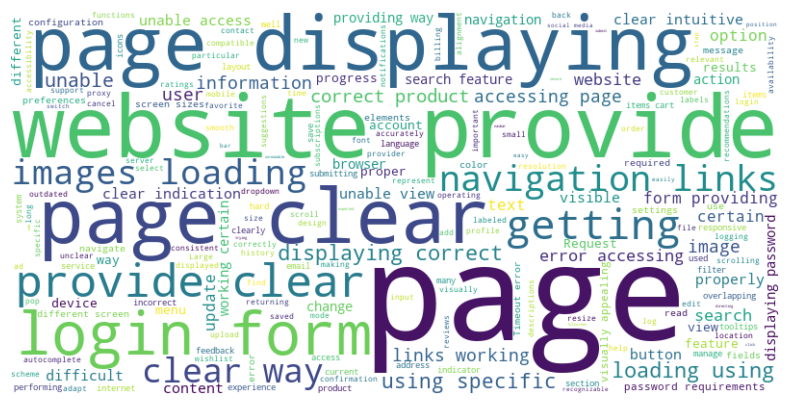

In [150]:
# Remove stopwords from the column values
def remove_stopwords(values):
    stop_words = set(stopwords.words('english'))
    cleaned_values = []
    for value in values:
        words = value.split()
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_values.append(' '.join(cleaned_words))
    return cleaned_values

column_values = df_data.tolist()
cleaned_values = remove_stopwords(column_values)

# Create Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate(' '.join(cleaned_values))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

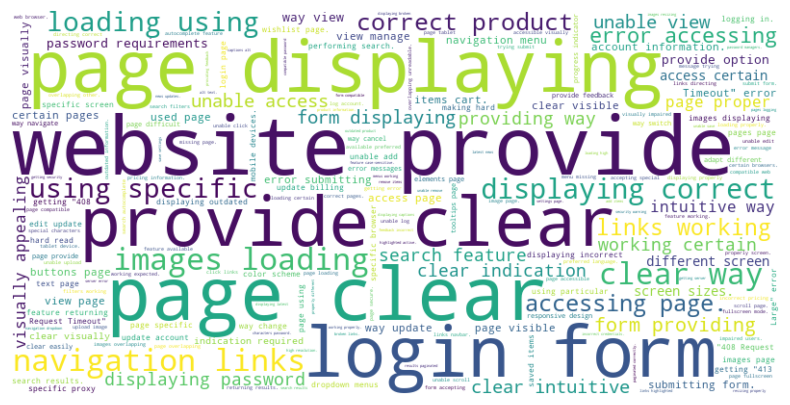

In [151]:
def generate_wordcloud_from_column(df):
    # Get the column values as a list
    column_values = df["complaint"].tolist()

    #Remove stopwords from the column values
    cleaned_values = remove_stopwords(column_values)

    # Combine two words separated by a space
    word_pairs = []
    for value in cleaned_values:
        words = value.split()
        pairs = [words[i] + ' ' + words[i+1] for i in range(len(words) - 1)]
        word_pairs.extend(pairs)

    # Create the word cloud from the frequencies
    word_pair_freq = Counter(word_pairs)
    wordcloud.generate_from_frequencies(dict(word_pair_freq))

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud_from_column(df)

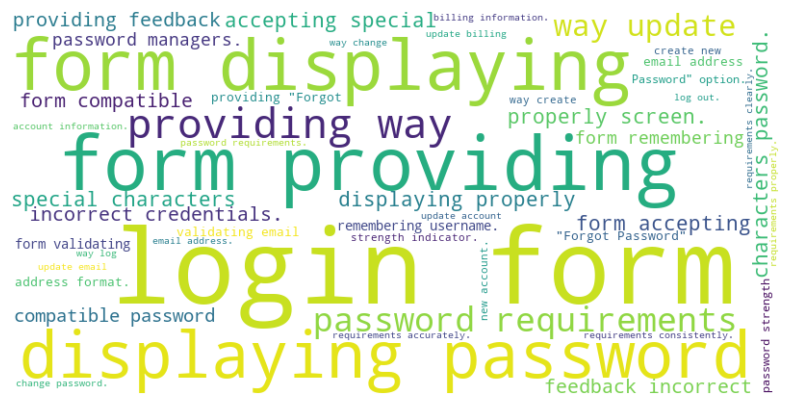

In [152]:
filter_word = "login form"

df_filtered = df.loc[df.complaint.str.contains(filter_word)]
generate_wordcloud_from_column(df_filtered)

In [153]:
print(df_filtered.values[0:5])

[['The login form is not displaying properly on my screen.' 'page error']
 ['The login form is not accepting special characters in the password.'
  'page error']
 ['The login form is not providing any feedback on incorrect credentials.'
  'page error']
 ['The login form is not compatible with password managers.' 'page error']
 ['The login form is not remembering my username.' 'page error']]


In [154]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [155]:
embeddings = model.encode(df_data)
print(embeddings)

[[ 3.9685342e-02 -3.9053235e-02  8.2974620e-03 ... -6.1678011e-02
  -2.7342960e-02 -2.3235710e-02]
 [-2.5315713e-03 -3.8714480e-02  7.1004173e-03 ...  4.2727806e-02
  -3.0616734e-02 -1.4601770e-02]
 [-2.2966526e-02  2.1667972e-02 -4.6808057e-02 ...  2.5043331e-02
   1.2983609e-02 -5.7523218e-03]
 ...
 [-2.4091888e-02 -3.3893671e-02 -2.0839781e-02 ...  7.3941037e-02
  -1.4145844e-02 -4.3505020e-03]
 [-3.7719354e-02 -6.1810613e-05 -1.2349032e-02 ...  7.4871026e-02
   3.2352097e-02  1.3452702e-02]
 [-8.8037644e-03 -3.0161507e-02 -3.6534267e-03 ...  8.3117597e-03
   4.0989809e-02  4.8628179e-03]]


In [156]:
def plot_word_embeddings(df, embeddings):
    # Apply UMAP dimensionality reduction
    umap_embeddings = umap.UMAP(n_components=2, metric='cosine', min_dist=0.0, random_state=10).fit(embeddings)

    # Create a scatter plot using Plotly
    fig = px.scatter(
    x=umap_embeddings.embedding_[:,0], 
    y=umap_embeddings.embedding_[:,1], 
    color=df.category, 
    hover_data=[df.complaint],
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    width=1000, height=800
    )

    fig.show()
plot_word_embeddings(df, embeddings)

In [157]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(embeddings, df.category, test_size=0.2, random_state=42)

svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9111111111111111


In [158]:
text_to_predict = "When i signed into the page, i got an error message, and the page wouldn't load."
cmp_pred = svc.predict(model.encode(text_to_predict).reshape(1, -1))
print(cmp_pred[0])

page error


In [160]:
text_to_predict = "The text is too small"
cmp_pred = svc.predict(model.encode(text_to_predict).reshape(1, -1))
print(cmp_pred[0])

UI


In [161]:
def find_duplicates(filename, column_name):
    df = pd.read_csv(filename)
    duplicates = df[df.duplicated(subset=column_name, keep=False)]
    return duplicates
dupes = find_duplicates("data/dataset.csv", "complaint")
len(dupes)

0